In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 1: Load the dataset
df = pd.read_excel('Predictive maintenance system for network infrastructure.xlsx')
df.head(10)

,Timestamp,Device,CPU (%),Memory (%),Errors (Count),Traffic (Mbps),Current Status,System State,Historical State,Future State Prediction
0,2024-11-22 09:20:00,Router_A,99.88,36.92,1,213.78,Critical,Future,NaN,Critical
1,2024-11-22 09:25:00,Firewall_1,49.51,58.82,4,130.31,Healthy,Future,NaN,Healthy
2,2024-11-22 11:00:00,Switch_3,54.81,83.62,27,355.47,At Risk,Future,NaN,Healthy
3,2024-11-22 11:05:00,Router_C,63.68,86.95,15,356.59,Healthy,Future,NaN,At Risk
4,2024-11-22 11:35:00,Router_A,25.42,89.29,48,79.45,Healthy,Future,NaN,Critical
5,2024-11-22 12:00:00,Switch_1,37.25,69.03,33,209.37,Healthy,Historical,Overloaded,NaN
6,2024-11-22 12:35:00,Router_B,63.00,39.63,21,64.75,At Risk,Future,NaN,Healthy
7,2024-11-22 13:10:00,Switch_1,62.70,67.34,35,398.76,Healthy,Future,NaN,Healthy
8,2024-11-22 13:20:00,Router_B,95.50,86.14,46,102.76,Healthy,Future,NaN,Critical
9,2024-11-22 14:30:00,Router_A,75.91,57.70,12,162.70,Critical,Future,NaN,At Risk


In [3]:
# Step 2: Preprocess the data
# Define features and target
features = ['CPU (%)', 'Memory (%)', 'Errors (Count)', 'Traffic (Mbps)']
target = 'Current Status'

X = df[features]  # Features
y = df[target]    # Target

# Encode target variable if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 2, 2, 0, 0, 1])

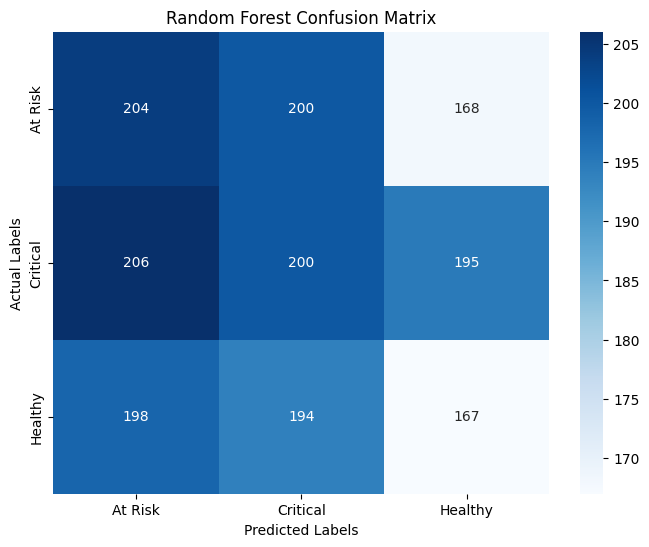

In [5]:
# Step 6: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show();

In [6]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.34      0.36      0.35       572
    Critical       0.34      0.33      0.33       601
     Healthy       0.32      0.30      0.31       559

    accuracy                           0.33      1732
   macro avg       0.33      0.33      0.33      1732
weighted avg       0.33      0.33      0.33      1732



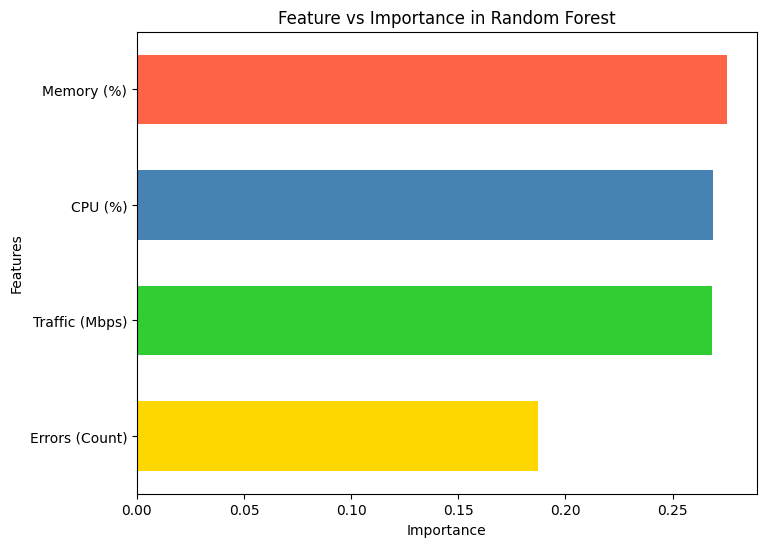

In [7]:
# Step 7: Analyze Feature Importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x="Importance", y="Feature", data=feature_importance_df, width=0.6)
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
# Apply the colors to each bar
for i, bar in enumerate(bar_plot.patches):
    bar.set_facecolor(colors[i % len(colors)])

plt.title("Feature vs Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show();